In [1]:
##https://www.youtube.com/watch?v=9wmImImmgcI&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=11

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Check How Many Pepole Exited Or Not Exited

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Remove this col:-

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


# Apply ONE Hot Encoder :- Geography & Gender Col

In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Train Test Split Apply:-

In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


# Apply Scaliing:-

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

# Apply Tensorflow

In [22]:
##!pip install tensorflow

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

# Build Modle:-

In [24]:
model = Sequential()

# Layer Add:-

In [25]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [28]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10

250/250 [==============================] - 1s 2ms/step - loss: 0.5373
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4910
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4695
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4555
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4458
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4392
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4348
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4318
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4298
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4283


# Check Weights & Bias Value:-

In [29]:
model.layers[0].get_weights()

[array([[ 0.0343276 ,  0.19116068,  0.30202928],
        [-1.1965138 ,  1.0022984 , -0.57652456],
        [-0.3098455 , -0.4119397 ,  0.1957016 ],
        [-0.18286425, -0.10143045, -0.29465756],
        [ 0.54349697,  0.34478924,  0.04667669],
        [ 0.15993097, -0.3477546 , -0.35055816],
        [ 0.3132315 , -0.90083385,  0.61525244],
        [-0.2210747 ,  0.2937721 ,  0.38398245],
        [-0.25745407,  0.60059285, -0.5014581 ],
        [-0.13257375,  0.07520428,  0.11575262],
        [ 0.13372776,  0.01139896,  0.81284475]], dtype=float32),
 array([ 0.41656756, -0.3623729 ,  0.3641053 ], dtype=float32)]

In [30]:
model.layers[1].get_weights()

[array([[-1.6586651],
        [ 1.0290421],
        [-1.4266254]], dtype=float32),
 array([-0.27411175], dtype=float32)]

In [31]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


array([[0.09780886],
       [0.13993043],
       [0.12477201],
       ...,
       [0.06412836],
       [0.14558549],
       [0.35740587]], dtype=float32)

In [32]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [33]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)

In [34]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Check Accuracy Score:-

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

0.8085

# Immprove Accuracy:-

In [37]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100

128/128 [==============================] - 1s 4ms/step - loss: 4142.9189 - accuracy: 0.7116 - val_loss: 99.9770 - val_accuracy: 0.7481
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 71.3619 - accuracy: 0.6458 - val_loss: 22.2934 - val_accuracy: 0.7681
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 40.9250 - accuracy: 0.6764 - val_loss: 67.9041 - val_accuracy: 0.5487
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 53.6044 - accuracy: 0.6712 - val_loss: 11.5686 - val_accuracy: 0.5894
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 35.9231 - accuracy: 0.6737 - val_loss: 93.5556 - val_accuracy: 0.4694
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 60.7288 - accuracy: 0.6842 - val_loss: 45.8887 - val_accuracy: 0.5150
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 64.1499 - accuracy: 0.6783 - val_loss: 19.6866 - val

128/128 [==============================] - 0s 2ms/step - loss: 47.0419 - accuracy: 0.6911 - val_loss: 31.0733 - val_accuracy: 0.7956
Epoch 56/100
128/128 [==============================] - 0s 3ms/step - loss: 48.0067 - accuracy: 0.6888 - val_loss: 77.0509 - val_accuracy: 0.3144
Epoch 57/100
128/128 [==============================] - 0s 3ms/step - loss: 42.1302 - accuracy: 0.6888 - val_loss: 38.9727 - val_accuracy: 0.5150
Epoch 58/100
128/128 [==============================] - 0s 3ms/step - loss: 40.3503 - accuracy: 0.6862 - val_loss: 30.2915 - val_accuracy: 0.7819
Epoch 59/100
128/128 [==============================] - 0s 3ms/step - loss: 38.9639 - accuracy: 0.6872 - val_loss: 27.9551 - val_accuracy: 0.7775
Epoch 60/100
128/128 [==============================] - 0s 3ms/step - loss: 31.7384 - accuracy: 0.6837 - val_loss: 40.4546 - val_accuracy: 0.7969
Epoch 61/100
128/128 [==============================] - 0s 3ms/step - loss: 45.4785 - accuracy: 0.6817 - val_loss: 23.0850 - val_accuracy

In [41]:
y_log = model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 2ms/step


array([[0.02110102],
       [0.45601472],
       [0.21689782],
       ...,
       [0.00540208],
       [0.767062  ],
       [0.46350622]], dtype=float32)

In [42]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [43]:
accuracy_score(y_test,y_pred)

0.6595

In [44]:
import matplotlib.pyplot as plt

In [45]:
history.history

{'loss': [4142.9189453125,
  71.3619155883789,
  40.92496871948242,
  53.60443878173828,
  35.923065185546875,
  60.72877502441406,
  64.14994812011719,
  43.07803726196289,
  43.7192268371582,
  42.43437576293945,
  48.841976165771484,
  48.118404388427734,
  60.6594123840332,
  46.186004638671875,
  48.925357818603516,
  56.659812927246094,
  47.124141693115234,
  60.06187057495117,
  49.210514068603516,
  58.396995544433594,
  50.68412780761719,
  62.95899963378906,
  46.82730484008789,
  52.69719696044922,
  58.164615631103516,
  30.949542999267578,
  44.44384765625,
  35.9917106628418,
  51.77561569213867,
  36.3863410949707,
  44.94089889526367,
  41.09404754638672,
  43.91868209838867,
  43.08536148071289,
  41.096675872802734,
  43.597591400146484,
  40.7980842590332,
  48.3315544128418,
  55.180084228515625,
  34.192893981933594,
  27.974916458129883,
  44.8979377746582,
  42.58357238769531,
  38.578880310058594,
  57.61397933959961,
  42.702796936035156,
  48.143959045410156,

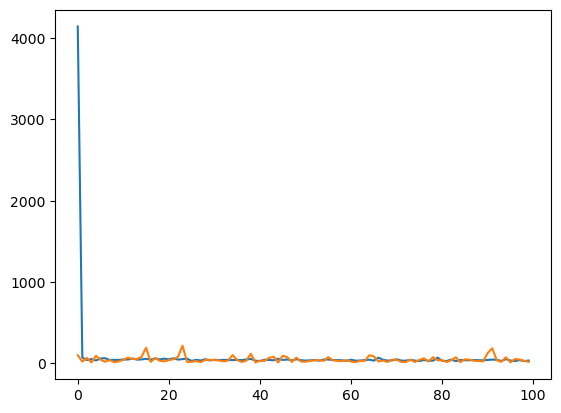

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

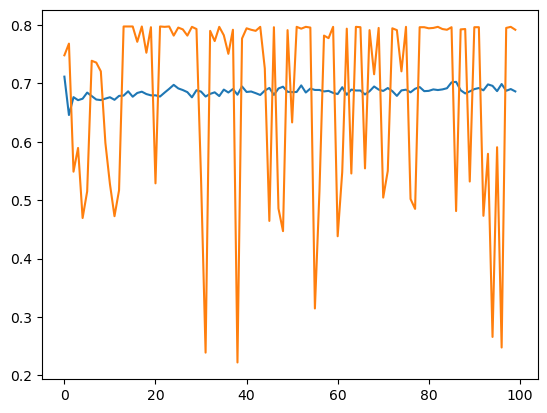

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])